In [1]:
import neurolab as nl

The goal of learning is reached


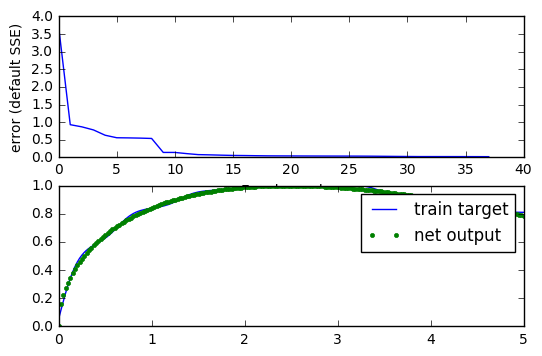

In [2]:
import neurolab as nl
import numpy as np

# Create train samples
x = np.linspace(0, 5, 200)
y = np.sin(np.sqrt(x))

size = len(x)

inp = x.reshape(size,1)
tar = y.reshape(size,1)

# Create network with 2 layers and random initialized
net = nl.net.newff([[0, 5]],[10, 1])

# Train network
error = net.train(inp, tar, epochs=500, show=100, goal=0.02)

# Simulate network
out = net.sim(inp)

# Plot result
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default SSE)')

x2 = np.linspace(0.0,5.0,200)
y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)


pl.subplot(212)
pl.plot(x2, y2, '-',x , y, '.')
pl.legend(['train target', 'net output'])
pl.show()

Epoch: 15; Error: 18.044260376671055;
Epoch: 30; Error: 2.5656032139854212;
Epoch: 45; Error: 1.9270896877700592;
Epoch: 60; Error: 1.8972960504971246;
Epoch: 75; Error: 1.7837735679245195;
Epoch: 90; Error: 1.5780747070188172;
Epoch: 105; Error: 0.1411779785894482;
The goal of learning is reached


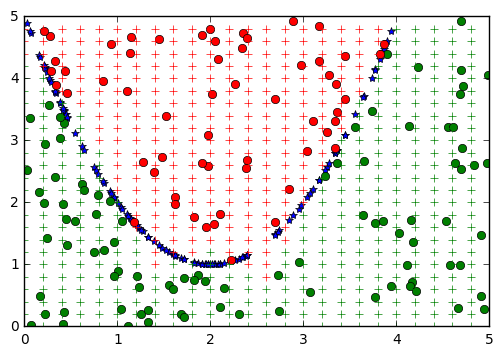

In [30]:
import numpy as np
import pylab as pl
import neurolab as nl

def get_class_by_data(y_sample, y_rand):
    y_result = y_sample.copy()
    for x in range(len(y_sample)):
        if y_sample[x]<y_rand[x]:
            y_result[x] = 1
        else:
            y_result[x] = 0
    return y_result

x = np.random.uniform(0, 5, (150, 2))
y = np.sign (x[:,1]-(x[:,0]**2-x[:,0]*4+5)).reshape(150,1)
pl.plot(x[:,0], (x[:,0]**2-x[:,0]*4+5), 'b*')

net = nl.net.newff([[0, 5], [0, 5]], [5,1])
a = net.sim(x)

err = net.train(x,y, show=15)
a = net.sim(x)
for i in range(len(y)):
    if a[i]>0:
        pl.plot(x[i,0], x[i,1], 'ro')
    if a[i]<0:
        pl.plot(x[i,0], x[i,1], 'go')

xx, yy = np.meshgrid(np.arange(0, 5, 0.2), np.arange(0, 5, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
t = np.concatenate((xx, yy), axis=1)
a = net.sim(t)
gr1 = t[a[:, 0]>0]
gr2 = t[a[:, 0]<0]

pl.plot(gr1[:,0], gr1[:,1], 'r+', gr2[:,0], gr2[:,1], 'g+')
pl.axis([0, 5, 0, 5])
pl.show()


Epoch: 10; Error: 11.5;
Epoch: 20; Error: 6.5;
Epoch: 30; Error: 8.0;
Epoch: 40; Error: 11.5;
The goal of learning is reached


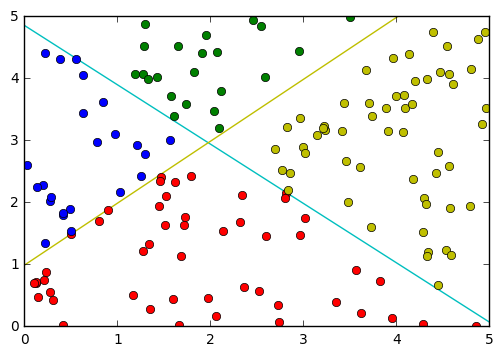

In [14]:
# Создайте и обучите ИНС, которая решает следующую задачу классификации:

# I класс: {(x1,x2), x2 < 5-x1, x2 < x1+1; 0 ≤ x1 ≤ 5; 0 ≤ x2 ≤ 5; x1ÎR; x2ÎR}

# II класс: {(x1,x2), x2 < 5-x1, x2 > x1+1; 0 ≤ x1 ≤ 5; 0 ≤ x2 ≤ 5; x1ÎR; x2ÎR}

# III класс: {(x1,x2), x2 > 5-x1, x2 < x1+1; 0 ≤ x1 ≤ 5; 0 ≤ x2 ≤ 5; x1ÎR; x2ÎR}

# IV класс: {(x1,x2), x2 > 5-x1, x2 > x1+1; 0 ≤ x1 ≤ 5; 0 ≤ x2 ≤ 5; x1ÎR; x2ÎR}
def get_class_by_data(x):
    y_result = []
    for i in range(len(x)):
        if x[i,1] < 5 -x[i,0] and x[i,1] < 1 + x[i,0]:
            y_result.append([0,0])
        elif x[i,1] < 5 -x[i,0] and x[i,1] > 1 + x[i,0]:
            y_result.append([0,1])
        elif x[i,1] > 5 -x[i,0] and x[i,1] < 1 + x[i,0]: 
            y_result.append([1,0])
        elif x[i,1] > 5 -x[i,0] and x[i,1] > 1 + x[i,0]: 
            y_result.append([1,1])
    return y_result
import numpy as np
import neurolab as nl
import pylab as pl
# Logical &
x = np.random.uniform(0, 5, (150, 2))
y = get_class_by_data(x)

# Create net with 2 inputs and 1 neuron
net = nl.net.newp([[0, 5],[0, 5]], 2)


# for i in range(len(x)):

# train with delta rule
# see net.trainf
error = net.train(x, y, epochs=100, show=10, lr=0.1)
a = net.sim(x)
# Plot results
w = net.layers[0].np['w'][0]
b = net.layers[0].np['b'][0]
w_1 = net.layers[0].np['w'][1]
b_1 = net.layers[0].np['b'][1]
pl.plot([0., 5.],[-b/w[1], (-b-5*w[0])/w[1]],'c')
pl.plot([0., 5.],[-b_1/w_1[1], (-b_1-5*w_1[0])/w_1[1]],'y')

for i in range(len(x)):
    if list(a[i]) == [0.,0.]:
        pl.plot(x[i,0], x[i,1], 'ro')
    if list(a[i]) == [0.,1.]:
        pl.plot(x[i,0], x[i,1], 'bo')
    if list(a[i]) == [1.,0.]:
        pl.plot(x[i,0], x[i,1], 'yo')
    if list(a[i]) == [1.,1.]:
        pl.plot(x[i,0], x[i,1], 'go')

pl.axis([0, 5, 0, 5])
pl.show()
# pl.plot(error)
# pl.xlabel('Epoch number')
# pl.ylabel('Train error')
# pl.grid()
# pl.show()

In [11]:
type(a[0])

numpy.ndarray

Epoch: 100; Error: 16.895831252912657;
Epoch: 200; Error: 16.89728392995452;
Epoch: 300; Error: 16.8972547862172;
Epoch: 400; Error: 16.89725449699008;
The maximum number of train epochs is reached


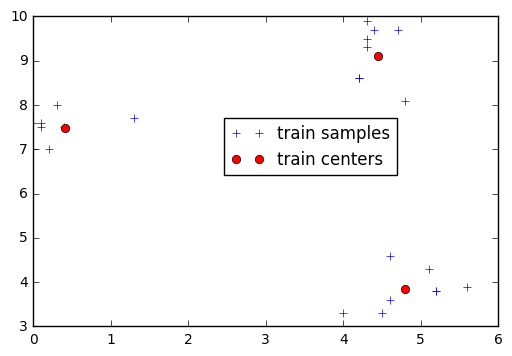

In [18]:
import numpy as np
import neurolab as nl
import pylab as pl
x_1 = np.array([[0, 7], [4.7, 9.7], [4.6, 4.6], [1.3, 7.7], \
                [4.4, 9.7], [4.6, 3.6], [0.4, 7.5], [4.3, 9.9], \
                [5.6, 3.9], [0.2, 7], [4.8, 8.1], [5.1, 4.3], \
                [0.3, 8], [4.3, 9.3], [4, 3.3], [0, 7.6], \
                [4.2, 8.6], [5.2, 3.8], [0.1, 7.6], [4.2, 8.6], \
                [5.2, 3.8], [0.1, 7.5], [4.3, 9.5], [4.5, 3.3]])
np.random.shuffle(x_1)
#Создание и обучение слоя Кохонена
net = nl.net.newc([[0.0, 1.0],[0.0, 1.0]], 3)
error = net.train(x_1, epochs=400, show=100)
#Рисование кластеров и их центров
w = net.layers[0].np['w']
pl.plot(x_1[:,0], x_1[:,1], 'b+', w[:,0], w[:,1], 'ro')
pl.legend(['train samples',  'train centers'],bbox_to_anchor=(0.8, 0.7))
pl.show() 

In [ ]:
x.shape

C:\Program Files\Anaconda3\lib\site-packages\neurolab\net.py:179: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  layer_out.np['w'][n][st:i].fill(1.0)


Epoch: 100; Error: 0.043333333333333335;
Epoch: 200; Error: 0.03;
Epoch: 300; Error: 0.03;
Epoch: 400; Error: 0.02666666666666667;
Epoch: 500; Error: 0.023333333333333334;
Epoch: 600; Error: 0.023333333333333334;
Epoch: 700; Error: 0.023333333333333334;
Epoch: 800; Error: 0.023333333333333334;
Epoch: 900; Error: 0.023333333333333334;
Epoch: 1000; Error: 0.023333333333333334;
The maximum number of train epochs is reached


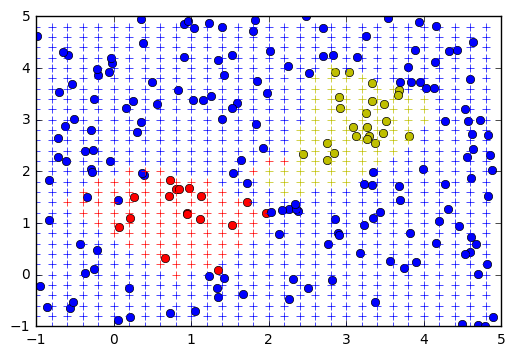

In [33]:
import numpy as np
import neurolab as nl
import pylab as pl

def get_class_by_data(x):
    y_result = np.zeros((200, 3))
    for i in range(len(x)):
        if (x[i,0]-1)**2+(x[i,1]-1)**2 < 1:
            y_result[i,0] = 1
        elif (x[i,0]-3)**2+(x[i,1]-3)**2 < 1:
            y_result[i,1] = 1
        elif (x[i,0]-1)**2+(x[i,1]-1)**2 > 1: 
            y_result[i,2] = 1
    return y_result


#Задание 10 точек, распределенных по 2 классам
x = np.random.uniform(-1, 5, (200, 2))
y = get_class_by_data(x)
class1 = x[y[:, 0]>0]
class2 = x[y[:, 1]>0]
class3 = x[y[:, 2]>0]
pl.plot(class1[:,0], class1[:,1], 'ro', class2[:,0], class2[:,1], 'yo', class3[:,0], class3[:,1],'bo')
#Создание и обучение сети встречного распространения
net = nl.net.newlvq(nl.tool.minmax(x), 20, [.2, .4, .4])
error = net.train(x, y, epochs=1000, goal=-1) 

#Опрос обученной сети
xx, yy = np.meshgrid(np.arange(-1, 5, 0.2), np.arange(-1, 5, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
t = np.concatenate((xx, yy), axis=1)
a = net.sim(t)
#Визуализация результатов
gr1 = t[a[:, 0]>0]
gr2 = t[a[:, 1]>0]
gr3 = t[a[:, 2]>0]
pl.plot(gr1[:,0], gr1[:,1], 'r+', gr2[:,0], gr2[:,1], 'y+', gr3[:,0], gr3[:,1], 'b+')
#pl.axis([-3.2, 3.2, -3, 3])
#pl.legend(['class 1', 'class 2','class 3', 'detected class 1', 'detected class 2', 'detected class 3'])
pl.show() 